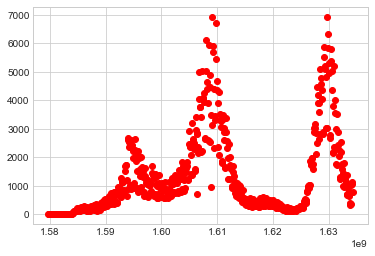

In [1]:
import numpy as np
import csv
import time
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def readTrendDataFromCSV(file):
    # Read CSV and delete label rows/columns
    reader = csv.reader(open(file))
    data = list(reader)
    del data[0:3]
    data = np.array(data)
    data = np.delete(data, 0, 1)

    # Convert string dates to Unix timestamps for easy plotting
    for entry in data:
        eDateTime = datetime.strptime(entry[0], '%b %d %Y')
        entry[0] = int(time.mktime(eDateTime.timetuple()))

    # Cast entire array to integer type
    return data.astype(np.float64)

# Plot loaded trend data (x is Unix timestamp, Y is new case number)
alabamaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__alabama.csv')
plt.plot(alabamaCases[:, 0], alabamaCases[:, 1], 'ro')

In [2]:
# Create sets of 10 input data points and 1 output data point
# (model predicts the next case number given 10 previous case counts)
dataTimestamps = []
dataCuratedX = []
dataCuratedY = []

for index, entry in enumerate(alabamaCases):
    if index + 40 < len(alabamaCases):
        dataTimestamps.append(alabamaCases[index, 0])
        dataCuratedX.append(alabamaCases[index+1:index+41, 2])
        dataCuratedY.append(alabamaCases[index, 2])

dataCuratedX = np.array(dataCuratedX)
        
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(dataCuratedX)
dataCuratedX = scaler.transform(dataCuratedX)
        
# Split training and test data
trainingSplitIndex = round(len(dataCuratedX) * 0.3)
dataTrainingTimestamps = dataTimestamps[trainingSplitIndex:]
dataTrainingX = dataCuratedX[trainingSplitIndex:]
dataTrainingY = dataCuratedY[trainingSplitIndex:]
dataTestTimestamps = dataTimestamps[:trainingSplitIndex]
dataTestX = dataCuratedX[:trainingSplitIndex]
dataTestY = dataCuratedY[:trainingSplitIndex]

# Train model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', activation='identity',
                      learning_rate='adaptive', learning_rate_init=0.1,
                      max_iter=1000, hidden_layer_sizes=(20,4), random_state=1)
model.fit(dataTrainingX, dataTrainingY)
#plt.plot(model.loss_curve_)

C:\Users\weavercf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(20, 4),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=10000,
              random_state=1, solver='lbfgs')

Model vs training data (error)
[ 425.  429.  429.  429.  425.  437.  425.  432.  429.  435.  435.  408.
  399.  396.  435.  381.  359.  364.  369.  368.  357.  366.  371.  383.
  382.  389.  393.  415.  413.  417.  421.  424.  418.  433.  435.  447.
  452.  445.  452.  462.  465.  471.  481.  491.  535.  558.  569.  590.
  625.  687.  728.  756.  767.  789.  807.  826.  843.  818.  813.  822.
  843.  887.  927.  962. 1072. 1174. 1214. 1246. 1315. 1382. 1437. 1512.
 1621. 1665. 1704. 1759. 1857. 1975. 2106. 2236. 2296. 2348. 2440. 2520.
 2583. 2648. 2662. 2683. 2721. 2788. 2841. 2886. 2909. 3027. 3065. 3135.
 3255. 3414. 3605. 3880. 4224. 4401. 4556. 4327. 4332. 4480. 4543. 4572.
 4549. 4553. 4361. 4095. 3918. 3775. 3633. 3550. 3426. 3848. 4113. 4137.
 4158. 4187. 4200. 4208. 4209. 4191. 4115. 3981. 3825. 3764. 3695. 3622.
 3552. 3507. 3501. 3496. 3517. 3516. 3436. 2999. 2859. 2703. 2476. 2365.
 2271. 2189. 2446. 2412. 2365. 2333. 2303. 2290. 2261. 2241. 2218. 2195.
 2155. 2133. 2099. 2

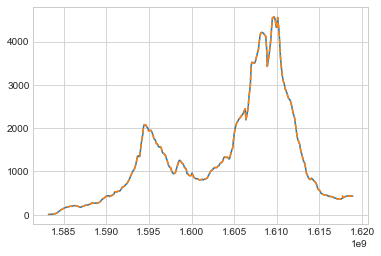

In [3]:
print('Model vs training data (error)')
dataTrainingPredY = model.predict(dataTrainingX)
print(dataTrainingPredY)
print(dataTrainingPredY - dataTrainingY)
plt.plot(dataTrainingTimestamps, dataTrainingY, '-', dataTrainingTimestamps, dataTrainingPredY, '--')

Model vs test data (error)
[ 6.700e+01  8.700e+01  1.360e+02  1.530e+02  1.510e+02  2.420e+02
  1.920e+02  1.450e+02  7.900e+01  3.300e+01 -1.000e+01 -5.800e+01
  6.800e+01  1.162e+03  1.121e+03 -4.610e+02  7.620e+02  6.840e+02
 -7.230e+02  4.640e+02 -1.676e+03  3.800e+02 -4.540e+02 -5.440e+02
 -6.370e+02 -7.100e+02 -8.520e+02 -9.240e+02 -9.890e+02  2.044e+03
  1.856e+03  1.632e+03  1.299e+03  1.271e+03  9.460e+02  8.850e+02
  7.700e+02  6.520e+02  5.040e+02  4.800e+02 -1.100e+01 -8.700e+01
 -1.720e+02 -5.140e+02 -7.890e+02 -1.129e+03 -1.266e+03 -3.415e+03
 -3.465e+03 -3.500e+03 -3.483e+03 -3.455e+03 -3.297e+03 -3.184e+03
 -3.033e+03 -3.014e+03 -2.976e+03 -2.867e+03 -2.759e+03 -2.640e+03
 -2.531e+03 -2.421e+03 -2.408e+03 -2.385e+03 -2.038e+03 -1.974e+03
 -1.879e+03 -1.804e+03 -1.715e+03 -1.670e+03 -1.596e+03 -1.490e+03
 -1.297e+03 -1.192e+03 -1.010e+03 -7.810e+02 -6.790e+02 -6.020e+02
 -4.770e+02 -1.067e+03 -8.030e+02 -6.420e+02 -4.940e+02 -3.860e+02
 -2.900e+02 -6.450e+02 -2.670e+02 -

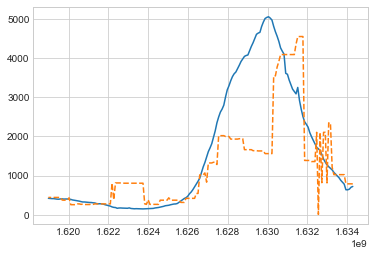

In [4]:
print('Model vs test data (error)')
dataTestPredY = model.predict(dataTestX)
print(dataTestPredY - dataTestY)
plt.plot(dataTestTimestamps, dataTestY, '-', dataTestTimestamps, dataTestPredY, '--')